# MF32 TEST

In [1]:
import sandy
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import pdb 

In [2]:
def plot_corr(cov_obj, ax, **kwargs):
    add = {"cbar": True, "vmin": -1, "vmax": 1, "cmap": "RdBu"}
    for k, v in kwargs.items():
        add[k] = v
    ax = sns.heatmap(cov_obj.get_corr().data, ax=ax, **add)
    return ax

due to a lack of mf32 files in nuclear data I couldn't find tests for all the situations. 

### LCOMP = 0 

In [3]:
tape = sandy.get_endf6_file("jeff_33", "xs", 952430) 

In [4]:
dic = sandy.read_mf32(tape, 9549)

### LCOMP = 1 LRF = 2 

In [5]:
tape = sandy.get_endf6_file("jeff_33", "xs", 952410) 

In [6]:
dic = sandy.read_mf32(tape, 9543)

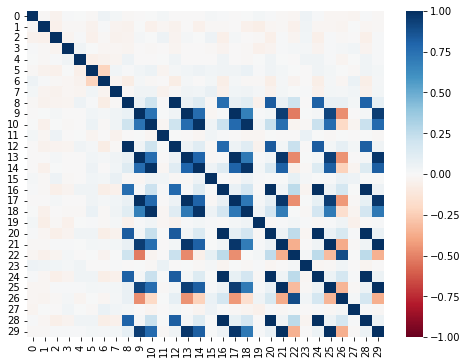

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
covmat = []
for i in range(30):
    covmat.append(dic["NIS"][95241]["NER"][(1e-05, 150.0)]['COVAR_PAR'][i][:30])
covmat = pd.DataFrame(covmat)
sandy.triu_matrix(covmat, kind = 'upper')
ax = plot_corr(sandy.CategoryCov(covmat), ax = ax)

### LCOMP = 2 LRF = 2 

In [8]:
tape = sandy.get_endf6_file("jeff_33", "xs", 551370)

In [9]:
dic = sandy.read_mf32(tape, 5537)
dic['NIS'][55137]['NER'][(1e-05, 56666.38)]["INTG"][0]

{'II': 3,
 'JJ': 2,
 'KIJ': array([-23,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0])}

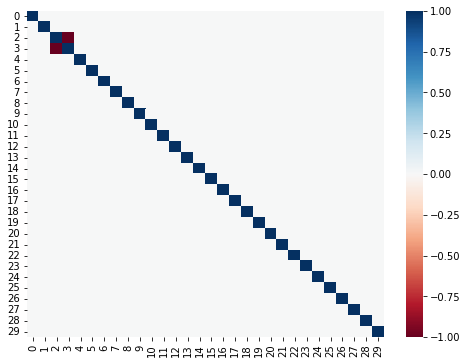

In [10]:
NNN = dic['NIS'][55137]['NER'][(1e-05, 56666.38)]["NNN"]
Z = np.zeros((30, 30))
for i in range(30):
    Z[i][i] = 1
for k in range(dic['NIS'][55137]['NER'][(1e-05, 56666.38)]["NM"]): 
    for j in range (len(dic['NIS'][55137]['NER'][(1e-05, 56666.38)]["INTG"][k]["KIJ"])):
        Z[dic['NIS'][55137]['NER'][(1e-05, 56666.38)]["INTG"][k]["II"]+j][dic['NIS'][55137]['NER'][(1e-05, 56666.38)]["INTG"][k]["JJ"]+j] = dic['NIS'][55137]['NER'][(1e-05, 56666.38)]["INTG"][k]["KIJ"][j]
fig, ax = plt.subplots(figsize=(8, 6))
sandy.triu_matrix(Z, kind='lower')
covmat = pd.DataFrame(Z)
ax = plot_corr(sandy.CategoryCov(Z), ax = ax)